In [1]:
import gc
import json
import pandas as pd
import numpy as np

from glob import glob
from tqdm import tqdm

from utils import loadpkl, removeCorrelatedVariables, removeMissingVariables

%matplotlib inline

In [2]:
files = sorted(glob('../features/*.feather'))
df = pd.concat([pd.read_feather(f) for f in tqdm(files, mininterval=60)], axis=1)

# set card_id as index
df.set_index('card_id', inplace=True)
df.head()

  0%|          | 0/1101 [00:00<?, ?it/s]/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pandas/io/feather_format.py:124: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  nthreads=int_use_threads)
/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels
100%|██████████| 1101/1101 [00:36<00:00, 29.79it/s]


,AOV,AOV_ratio,CLV,CLV_month_diff,CLV_month_diff_ratio,CLV_ratio,Mothers_Day_2018,Outlier_Likelyhood,amount_month_ratio_max,amount_month_ratio_mean,...,year,year_0,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
card_id,,,,,,,,,,,,,,,,,,,,,
C_ID_92a2005557,182.318395,1.661881,4.690294e+06,1.705895e+08,-0.008053,0.013005,49.492977,0.000273,NaN,NaN,...,0.007631,0,0,0,0,0,0,0,1,0
C_ID_3d0044924f,101.445060,0.159410,1.071890e+07,1.005798e+07,0.000050,0.000047,56.833333,0.001651,NaN,NaN,...,0.007631,0,0,0,0,0,0,0,1,0
C_ID_d639edf6cd,76.651163,0.679063,8.444000e+04,NaN,NaN,0.000367,15.720930,0.003357,NaN,NaN,...,0.015914,0,0,0,0,0,0,1,0,0
C_ID_186d6a6901,118.311688,0.856153,3.805900e+05,NaN,NaN,0.007076,55.623377,0.001447,NaN,NaN,...,0.007631,0,0,0,0,0,0,0,1,0
C_ID_cdbd2c0db2,249.208020,1.067407,2.299008e+06,-9.753155e+07,0.031752,0.078204,61.856099,0.000277,NaN,NaN,...,0.007631,0,0,0,0,0,0,0,1,0


In [4]:
configs = json.load(open('../configs/201_lgbm.json'))
df = df[configs['features']]
df.head()

,target,outliers,AOV_ratio,CLV_month_diff_ratio,CLV_ratio,Mothers_Day_2018,amount_month_ratio_min,amount_month_ratio_ratio,card_id_cnt_ratio,category_1_mean,...,new_weekend_sum,observation_date_ratio,pred_CLV_ratio,price_max,price_mean,price_ratio,purchase_amount_ratio,quarter,weekofyear,year
card_id,,,,,,,,,,,,,,,,,,,,,
C_ID_92a2005557,-0.820283,0.0,1.661881,-0.008053,0.013005,49.492977,-350.00,NaN,0.088462,0.000000,...,6.0,0.831091,0.043402,1329.000,11856.00000,NaN,0.146973,0.012998,0.012435,0.007631
C_ID_3d0044924f,0.392913,0.0,0.159410,0.000050,0.000047,56.833333,7.99,0.0,0.017143,0.088571,...,0.0,0.785113,0.000052,96.250,39.53125,0.332394,0.002733,0.017980,0.017699,0.007631
C_ID_d639edf6cd,0.688056,0.0,0.679063,NaN,0.000367,15.720930,NaN,NaN,0.023256,0.000000,...,1.0,0.831091,0.000000,NaN,NaN,NaN,0.015793,0.009038,0.009683,0.015914
C_ID_186d6a6901,0.142495,0.0,0.856153,NaN,0.007076,55.623377,NaN,NaN,0.090909,0.298701,...,3.0,0.831091,0.014900,287.250,55.12500,0.906318,0.077820,0.009038,0.006126,0.007631
C_ID_cdbd2c0db2,-0.159749,0.0,1.067407,0.031752,0.078204,61.856099,-156.09,NaN,0.270677,0.168338,...,12.0,0.831091,0.131382,130.375,104.00000,1.406941,0.288818,0.007716,0.007097,0.007631


In [5]:
corr = df.corr()
corr.to_csv('../output/corr_201.csv')
corr

,target,outliers,AOV_ratio,CLV_month_diff_ratio,CLV_ratio,Mothers_Day_2018,amount_month_ratio_min,amount_month_ratio_ratio,card_id_cnt_ratio,category_1_mean,...,new_weekend_sum,observation_date_ratio,pred_CLV_ratio,price_max,price_mean,price_ratio,purchase_amount_ratio,quarter,weekofyear,year
target,1.000000,-0.896187,-0.086001,-0.004712,-0.007692,0.091776,-0.042711,-0.014546,-0.016927,-0.041448,...,-0.026217,-0.046615,-0.005192,-0.008003,-0.003130,-0.044187,-0.044940,-0.034265,-0.041474,-0.042377
outliers,-0.896187,1.000000,0.003197,-0.003920,-0.003340,-0.085621,0.040595,-0.023815,-0.023908,0.046674,...,-0.027877,0.041955,-0.001498,-0.023982,-0.013966,-0.000111,-0.012537,0.035540,0.043356,0.045127
AOV_ratio,-0.086001,0.003197,1.000000,0.058139,0.059970,-0.022074,0.074251,0.359895,-0.036189,0.072001,...,-0.034961,0.006858,0.097624,0.046743,0.046557,0.608367,0.360128,0.008221,0.011936,0.010837
CLV_month_diff_ratio,-0.004712,-0.003920,0.058139,1.000000,0.683888,-0.021999,0.008532,0.709415,0.330671,0.004527,...,0.029782,0.000314,0.262392,-0.007302,-0.012519,0.026878,0.568570,-0.006421,-0.006121,-0.003223
CLV_ratio,-0.007692,-0.003340,0.059970,0.683888,1.000000,-0.009621,0.006917,0.688681,0.460852,0.002977,...,0.061144,-0.000177,0.269461,-0.007716,-0.014286,0.028926,0.678429,-0.013936,-0.013311,-0.009603
Mothers_Day_2018,0.091776,-0.085621,-0.022074,-0.021999,-0.009621,1.000000,-0.109980,-0.084126,0.011561,0.021712,...,0.032732,-0.171327,-0.003101,-0.031743,-0.034271,-0.006449,-0.017021,-0.201511,-0.212317,-0.226198
amount_month_ratio_min,-0.042711,0.040595,0.074251,0.008532,0.006917,-0.109980,1.000000,0.008302,0.008767,0.083912,...,-0.275177,-0.055257,0.001513,-0.081646,-0.070520,0.066903,0.018612,0.075649,0.086173,0.085771
amount_month_ratio_ratio,-0.014546,-0.023815,0.359895,0.709415,0.688681,-0.084126,0.008302,1.000000,0.544019,0.013386,...,0.128004,0.017978,0.368671,-0.004706,-0.041964,0.275040,0.965754,-0.015559,-0.018929,-0.019168
card_id_cnt_ratio,-0.016927,-0.023908,-0.036189,0.330671,0.460852,0.011561,0.008767,0.544019,1.000000,0.010401,...,0.248759,-0.006160,0.088969,-0.082729,-0.120787,-0.047574,0.556901,-0.122917,-0.124843,-0.134714
category_1_mean,-0.041448,0.046674,0.072001,0.004527,0.002977,0.021712,0.083912,0.013386,0.010401,1.000000,...,-0.090712,-0.000317,0.005460,-0.242070,-0.199520,0.105904,0.018028,0.000096,0.000263,-0.054316


In [4]:
# split test & train
train_df = df[df['target'].notnull()]
test_df = df[df['target'].isnull()]

In [5]:
# Kolmogorov-Smirnov statistic on 2 samples

from scipy.stats import ks_2samp
list_p_value =[]

for c in tqdm(train_df.columns.tolist()):
    list_p_value.append(ks_2samp(test_df[c] , train_df[c])[1])

Se = pd.Series(list_p_value, index = train_df.columns.tolist()).sort_values() 
list_discarded = list(Se[Se < .1].index)

100%|██████████| 196/196 [00:06<00:00, 31.74it/s]


In [6]:
list_discarded

['target',
 'outliers',
 'purchase_amount_max',
 'new_category_2_mean_mean',
 'hist_purchase_amount_sum',
 'category_2_mean',
 'hist_pred_CLV',
 'new_AOV',
 'new_purchase_amount_mean',
 'hist_purchase_amount_max',
 'new_hour_mean',
 'new_hour_min',
 'hist_category_2_mean_mean',
 'hist_category_3_mean',
 'category_3_mean',
 'hist_installments_mean']

In [7]:
df.drop(list_discarded, axis=1, inplace=True)

In [8]:
features_json = {}
features_json['features'] = df.columns.tolist()
with open('../configs/tmp_features.json', 'w') as f:
    json.dump(features_json, f, indent=4)

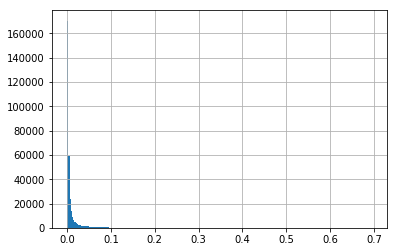

In [8]:
df.Outlier_Likelyhood.hist(bins=255)

In [21]:
corr['target'].sort_values().dropna()

outliers                                -0.896187
Outlier_Likelyhood                      -0.260876
hist_observation_date                   -0.161670
new_observation_date                    -0.161531
observation_date                        -0.161182
hist_month_diff_unapproved_sum          -0.130712
hist_duration_sum                       -0.127694
hist_duration_approved_sum              -0.116697
hist_duration_unapproved_sum            -0.110719
new_purchase_date_uptomin               -0.109221
new_time_recency                        -0.109098
hist_month_diff_unapproved_max          -0.107950
duration_max                            -0.107800
new_purchase_date_uptonow               -0.104960
new_recency                             -0.104960
hist_month_diff_max                     -0.104379
hist_month_diff_sum                     -0.103671
hist_month_diff_approved_max            -0.103545
month_diff_max                          -0.101834
hist_duration_max                       -0.100804
